### Week 4- Continuous Probability Distributions 
- Found a data set from Kaggle, which entails Amazon rating of sale products from the year 2023 (https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset)
- Code adapted from : https://git.arts.ac.uk/lmccallum/Intro-to-ds-23-24/blob/master/intro-to-ds-week-4-Discrete-Probabilies.ipynb

In [2]:
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names
import matplotlib
import matplotlib.pyplot as plt

#### Class tasks:
- Find a new dataset and use this code to plot the numerical variables and find the best fitting distribution for the data.

- Look at some of the different attributes in the pokedex, such as `weight_kg`, `speed` or any of the other attributes. Look at how the shape of these distributions differ from the height one, see what the best fitting distribution you can find for these attributes. Remember, you may need to drop the null values (`.dropna()`) before running the functions for calculating and comparing different distributions.

- Look through the list of [continous statistical distributions](https://docs.scipy.org/doc/scipy/tutorial/stats/continuous.html) on scipy, find some different distributions that we haven't used here. Can you find a distribution that fits the height of the pokemon better than the lognormal? If you want to see the whole list of names you can run:

### Data cleaning
- The 'discounted_price' and 'actual_price' still have the Indian Rupee sign (₹) which needs further cleaning using regex/ stop words.
- Drop all the 'NaN' values from the 'rating_column' 
- Change 'rating_count' column to a numeric type before plotting 


In [3]:
# Read the data file 
amazon = pd.read_csv('data/amazon.csv')

In [4]:
# Remove the '₹' symbol from the 'discounted_price' and 'actual_price' columns
amazon['discounted_price'] = amazon['discounted_price'].str.replace('₹', '')
amazon['actual_price'] = amazon['actual_price'].str.replace('₹', '')

# Remove the '%' sign and convert 'discount_percentage' to a numerical format
amazon['discount_percentage'] = amazon['discount_percentage'].str.replace('%', '').astype(float)

In [5]:
# What does the file look like?
amazon

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399,"1,099",64.0,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199,349,43.0,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199,"1,899",90.0,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329,699,53.0,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154,399,61.0,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379,919,59.0,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"2,280","3,045",25.0,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri..

In [6]:
# Reduce the columns to core numerical data.
    # I did so to help choose which column to work on. 
amazon = amazon[['product_id','discounted_price','actual_price','discount_percentage','rating','rating_count', 'product_link']]
amazon

,product_id,discounted_price,actual_price,discount_percentage,rating,rating_count,product_link
0,B07JW9H4J1,399,"1,099",64.0,4.2,"24,269",https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,199,349,43.0,4.0,"43,994",https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,199,"1,899",90.0,3.9,"7,928",https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,329,699,53.0,4.2,"94,363",https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,154,399,61.0,4.2,"16,905",https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...
1460,B08L7J3T31,379,919,59.0,4,"1,090",https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,"2,280","3,045",25.0,4.1,"4,118",https://www.amazon.in/Prestige-Delight-PRWO-1-...
1462,B009P2LIL4,"2,219","3,080",28.0,3.6,468,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...
1463,B00J5DYCCA,"1,399","1,890",26.0,4,"8,031",https://www.amazon.in/Havells-Ventilair-230mm-...


Opting for continuous data, the rating scale is set between 0 and 5, encompassing all possible values within this spectrum. Given that ratings can assume any figure in this uninterrupted span, they are regarded as continuous rather than discrete data.

In [7]:
# Drop NaN values from 'rating_count' ( previously had an error, could not turn NaN values in the 'rating_column' to a numeric type)
amazon = amazon.dropna(subset=['rating_count'])

In [8]:
# Convert 'rating_count' to numeric type
amazon['rating_count'] = amazon['rating_count'].str.replace(',', '').astype(float).astype(int)

<ipython-input-8-74258c68976b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['rating_count'] = amazon['rating_count'].str.replace(',', '').astype(float).astype(int)


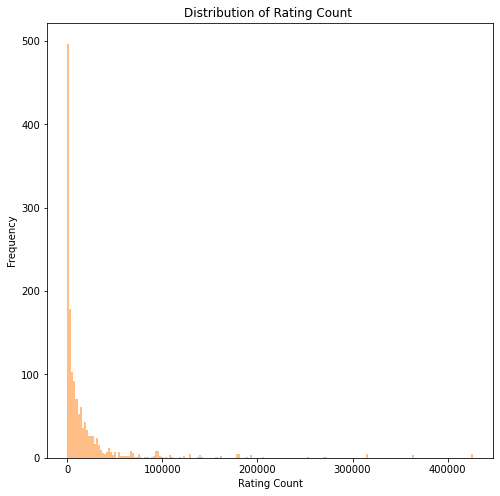

In [9]:
# Plot a histogram of the frequency of the rating_counts, bin rating to 200 for visualisation of the higher rating counts.
plt.figure(figsize=(8,8))
plt.hist(amazon['rating_count'], bins=200, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])
plt.xlabel('Rating Count')
plt.ylabel('Frequency')
plt.title('Distribution of Rating Count ')
plt.show()

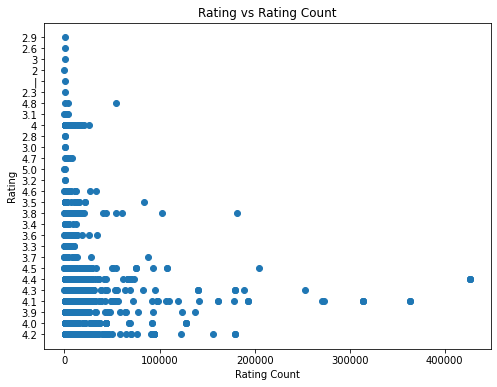

In [10]:
# Plot the relationship between 'rating' over 'rating_count using a scatter graph
plt.figure(figsize=(8,6))
plt.scatter(amazon['rating_count'], amazon['rating'])
plt.xlabel('Rating Count')
plt.ylabel('Rating')
plt.title('Rating vs Rating Count')
plt.show()

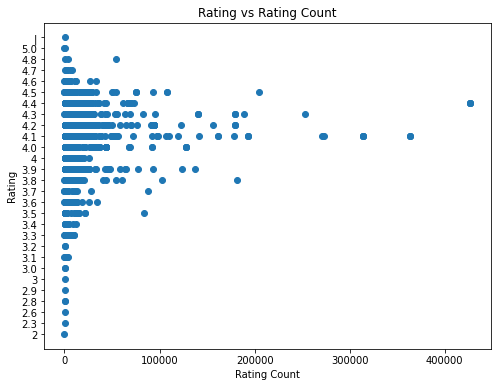

In [11]:
# Sort the data based on the 'rating' column
sorted_data = amazon.sort_values('rating')

plt.figure(figsize=(8,6))
plt.scatter(sorted_data['rating_count'], sorted_data['rating'])
plt.xlabel('Rating Count')
plt.ylabel('Rating')
plt.title('Rating vs Rating Count')
plt.show()

#### Which items can be found in the highest rating and rating count quartile?

In [33]:
import statsmodels.api as sm

# Read data from CSV
df = pd.read_csv('data/modified_amazon_file.csv')

# Convert string columns to numeric and fill missing values on modified csv
df['discounted_price'] = df['discounted_price'].str.replace(',', '').astype(float)
df['rating_count'] = df['rating_count'].str.replace(',', '').fillna(0).astype(int) 

# Replace non-numeric values in 'rating' column with NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Fill NaNs in 'rating' column with median rating
median_rating = df['rating'].median()
df['rating'] = df['rating'].fillna(median_rating)

# Define independent variables (features)
X = df[['discounted_price', 'rating_count']]

# Code adapted from: https://www.datacourses.com/linear-regression-in-python-using-statsmodels-911/

# Add constant term for intercept
X = sm.add_constant(X)

# Define dependent variable
y = df['rating']

# Fit regression model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     19.11
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           6.41e-09
Time:                        00:57:04   Log-Likelihood:                -253.79
No. Observations:                1465   AIC:                             513.6
Df Residuals:                    1462   BIC:                             529.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.0673      0.009  

The statistical significance of the coefficients. A p-value less than the chosen significance level (e.g., 0.05) suggests that the coefficient is statistically significant. In this case, both 'discounted_price' and 'rating_count' have p-values close to 0, indicating that they are statistically significant predictors of 'rating'

Most of the products listed in the amazon dataset have little to no rating counts, as determined by the left shift in data. Below shows the probability distribution of the rating_counts, which is highly populated between 0 and midway 100000. Thus, there is no normnal distribution.

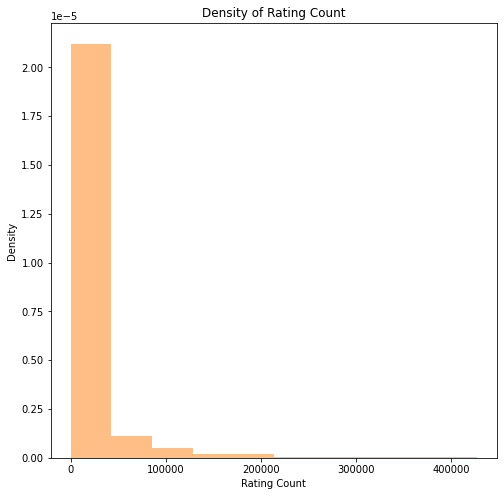

In [20]:
# Work out the density of the rating_count data
plt.figure(figsize=(8,8))
plt.hist(amazon['rating_count'], bins=10, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])
plt.ylabel('Density')
plt.xlabel('Rating Count')
plt.title('Density of Rating Count')
plt.show()

In [13]:
# Work out the Probability Density Function (PDF)
def make_pdf(dist, params, size=10000):
    """Generate distribution's Probability Density Function"""

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, loc=loc, scale=scale, *arg) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, loc=loc, scale=scale, *arg) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

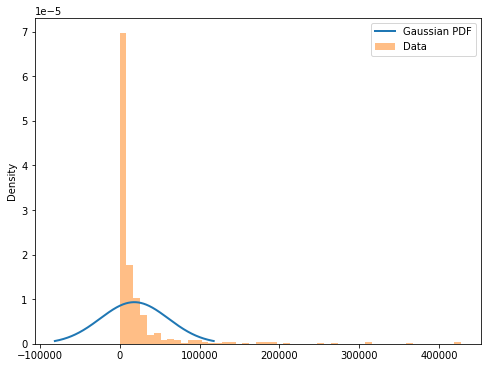

In [14]:
# Clean the 'rating_count' data by removing non-numeric or invalid values
cleaned_rating_count = amazon['rating_count'].dropna().astype(float)

# Fit the cleaned 'rating_count' data with a Gaussian distribution
dist_f = st.norm
params = dist_f.fit(cleaned_rating_count)
pdf = make_pdf(dist_f, params)

# Plot the Gaussian distribution curve onto PDF
plt.figure(figsize=(8,6))
ax = pdf.plot(lw=2, label='Gaussian PDF', legend=True)
cleaned_rating_count.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)
plt.ylabel('Density')
plt.show()

Text(0, 0.5, 'Density')

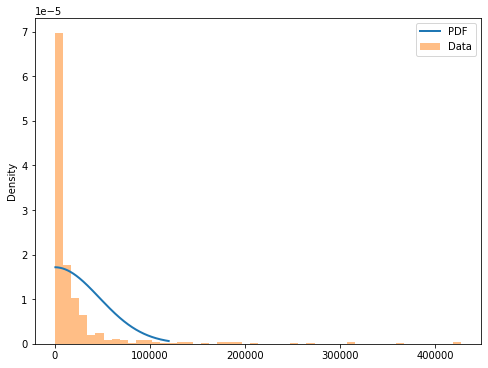

In [15]:
# Try another distribution function ( exponential distribution)
dist_f = st.skewnorm
params = dist_f.fit(amazon['rating_count'])
pdf = make_pdf(dist_f, params)

plt.figure(figsize=(8,6))
ax = pdf.plot(lw=2, label='PDF', legend=True)
amazon['rating_count'].plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)
ax.set_ylabel('Density')

In [16]:
def best_fit_distribution(data, dist_names, bins=200, ax=None, legend=True):
    """Model data by finding best fit distribution to data"""
    #Code adapted from: https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Best holders
    best_distributions = []

    # Estimate distribution parameters from data
    for ii, distribution in enumerate([d for d in dist_names if not d in ['levy_stable', 'studentized_range']]):
        distribution = getattr(st, distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')
                
                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]
                
                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                
                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax, legend=legend, label=distribution.name)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                best_distributions.append((distribution, params, sse))
        
        except Exception:
            pass

    return sorted(best_distributions, key=lambda x:x[2])

In [17]:
# This function will generate a single composite plot that overlays various distribution curves we aim to test against our dataset. Following that, it will display a separate plot highlighting the distribution that best fits our data.

def compare_and_plot_distributions(data, dist_names, legend=True):
    # Plot for comparison
    plt.figure(figsize=(8,6))
    ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'], legend=legend)
    ax.set_ylabel('Density')

    # Save plot limits
    dataYLim = ax.get_ylim()

    # Find best fit distribution
    best_distibutions = best_fit_distribution(data, dist_names, 200, ax, legend)
    best_dist = best_distibutions[0]

    # Update plots
    ax.set_ylim(dataYLim)

    # Make PDF with best params 
    pdf = make_pdf(best_dist[0], best_dist[1])

    # Display
    plt.figure(figsize=(8,6))
    plt.legend(loc='upper right')
    ax = pdf.plot(lw=2, label='PDF', legend=legend)
    ax.set_ylabel('Density')
    data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=legend, ax=ax)

    param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
    param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
    dist_str = '{}({})'.format(best_dist[0].name, param_str)

    ax.set_title(u'Best fit distribution \n' + dist_str)

In [18]:
dist_names = ['norm', 'expon', 'skewnorm', 'lognorm']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


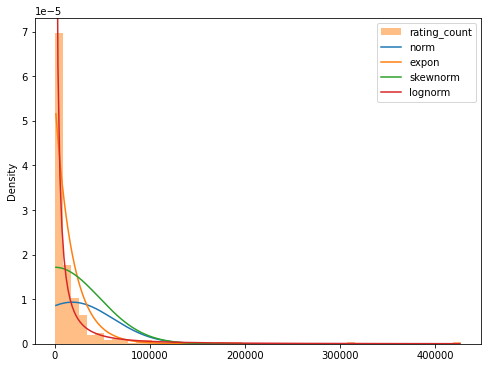

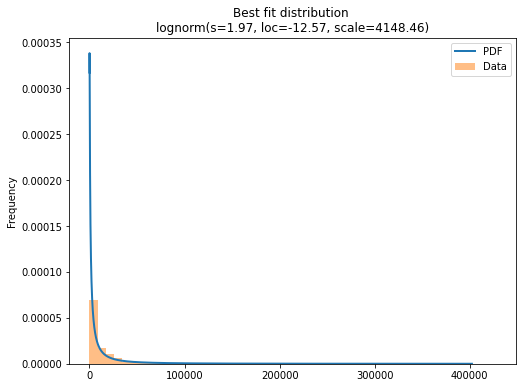

In [19]:
compare_and_plot_distributions(amazon['rating_count'], dist_names)